In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf

# ```Model 1```

In [7]:
data = pd.read_csv('/content/Churn_Modelling.csv')

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### ```Preprocessing Data```

In [9]:
X = data.iloc[:,3:-1]     # All rows but columns excluding the first 3
y = data.iloc[:,-1]       # All rows , but only the last column

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Building our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer
# Apply OneHotEncoder to 'Geography', LabelEncoder to 'Gender', and MinMaxScaler to other specified columns
# Note: LabelEncoder is typically for the target variable, but can be used here if needed for a binary feature.
# However, OneHotEncoder is generally preferred for nominal features like 'Gender' in X.
# Let's use OneHotEncoder for both 'Geography' and 'Gender' for consistency and to avoid potential issues.
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['Geography', 'Gender']),
    (MinMaxScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']),
    remainder='passthrough' # Keep any remaining columns (though none should be left in this case)
)

# Fitting the column transformer to our Training data and transforming
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

# Display the shapes of the transformed data to verify
print("Shape of X_train_transformed:", X_train_transformed.shape)
print("Shape of X_test_transformed:", X_test_transformed.shape)

Shape of X_train_transformed: (8000, 13)
Shape of X_test_transformed: (2000, 13)


###  ```Creating ANN```

In [13]:
model_1 = tf.keras.Sequential()

In [14]:
model_1.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [15]:
model_1.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [16]:
# Adding the Output layer
model_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### ```Training ANN```

In [17]:
# Commpiling
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [26]:
model_1.fit(X_train_transformed, y_train, epochs=100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3384
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.3461
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 0.3389
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - loss: 0.3387
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8609 - loss: 0.3410
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8659 - loss: 0.3347
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8616 - loss: 0.3393
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8653 - loss: 0.3319
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.3446
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3478
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8662 - loss: 0.3325
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

### ```Making Predictions```

In [31]:
# Evaluating
model_1.evaluate(X_test_transformed, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8560 - loss: 0.3470


[0.34630465507507324, 0.8569999933242798]

In [35]:
y_pred = model_1.predict(X_test_transformed)
y_pred  = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1512   95]
 [ 191  202]]


0.857

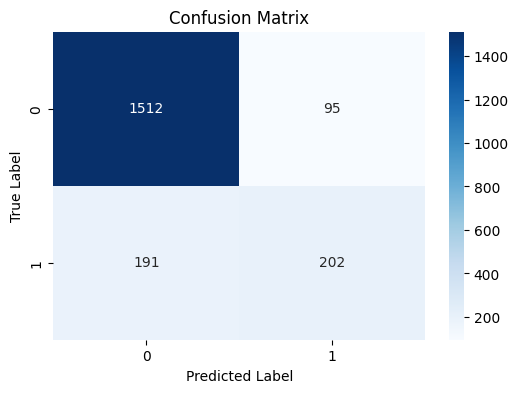

In [46]:
# Making our Confusion Matrix more Appealing
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()